In [1]:
ref='nb4-'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize':16,
    'axes.labelsize':16,
    'axes.xmargin':0.1,
    'axes.ymargin':0.1,
    'legend.fontsize':16,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'lines.markersize': 10,
    'lines.linewidth' : 3,
    'font.size': 16
})


f = open("../reports/{}explore.txt".format(ref), "w")
f.write("Data Exploration File \n")
f.write("===================== \n")


23

In [2]:
#Import Data
raw_data=pd.read_csv("../data/processed/gathered.csv",index_col=False )

# Add column to identify available time series (i.e walk_ids where as WalkId=SubjectId-RunId) 
subject_id=raw_data['SubjectId'].values
run_id=raw_data['RunId'].values
walk_ids = [str(int(i)) + '-' + str(int(j)) for i, j in zip(subject_id, run_id)]
raw_data['walk']=walk_ids



# Temporal Analysis grouped by walk

In [3]:
# Drop duplicate walk_ids
walk_ids=list(raw_data.drop_duplicates(subset=['walk'])['walk'].values)
#print('No. of available walk_ids (time series) in the dataset is {} performed by {} subjects'.format(len(walk_ids),len(set(subject_id))))
f.write('No. of available walk_ids (time series) in the dataset is {} performed by {} subjects \n\n'.format(len(walk_ids),len(set(subject_id))))



88

In [4]:
# Extract accelerations for each walk
walk_accls=[]
for i,walk in enumerate(walk_ids):
    this_walk_accls=raw_data[raw_data['walk']==walk][['x','y','z']].values
    walk_accls.append(this_walk_accls)


In [5]:
walk_samples=[len(x) for x in walk_accls]
walk_durations= [round(len(x)/100/60,1) for x in walk_accls]
walks_summary=pd.DataFrame(zip(walk_ids,walk_samples, walk_durations), columns=['walk','no_samples','duration (min)'])
walks_summary.to_csv("../reports/{}walks_summary.csv".format(ref))

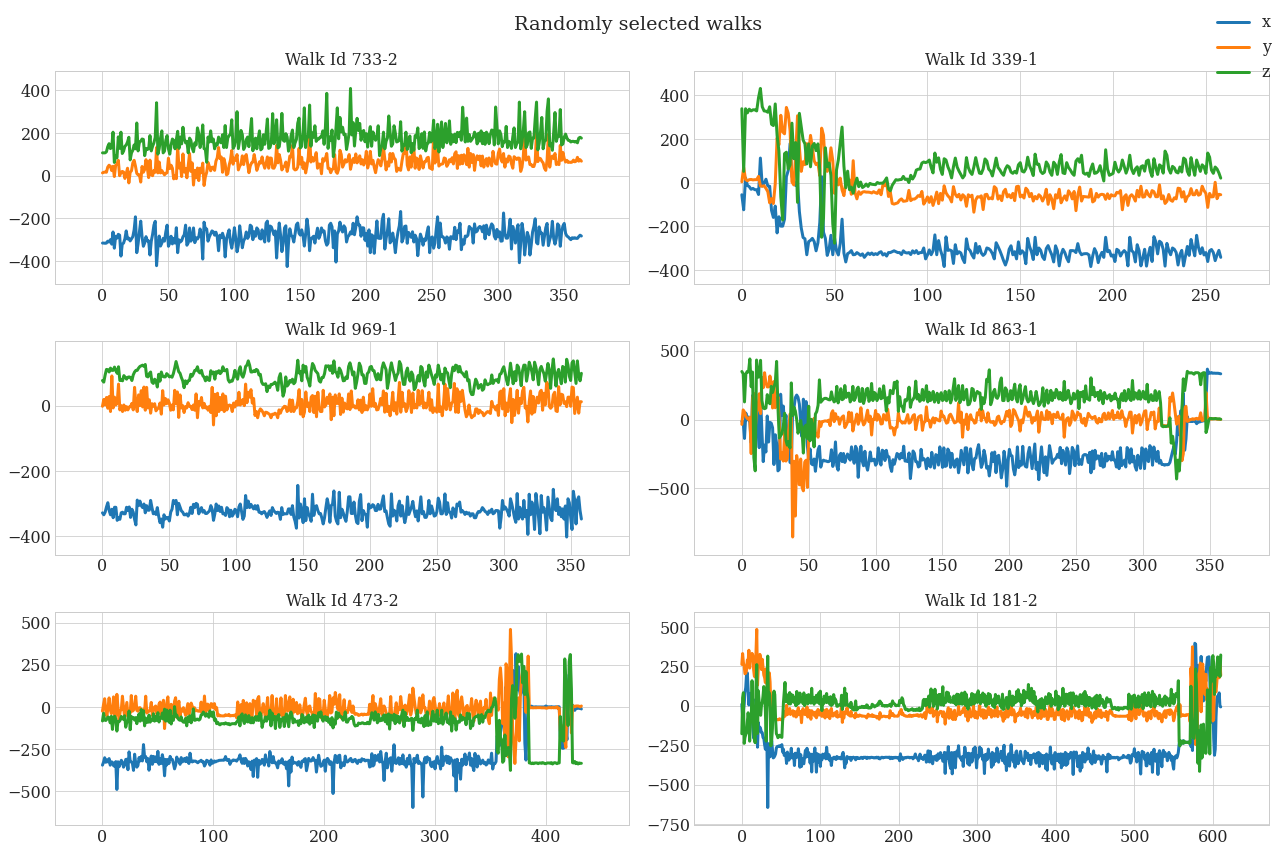

In [6]:
random.seed(12)
no_samples=6
samples=random.sample(list(zip(walk_ids, walk_accls)),no_samples)
plt.rcParams["figure.figsize"] = (18,12)
fig, axes = plt.subplots(int(no_samples/2), 2)
axes_lookup=np.arange(no_samples).reshape(int(no_samples/2),2)
for i in range(no_samples):
    x,y=np.argwhere(axes_lookup==i).flatten()
    axes[x,y].plot(samples[i][1][:,0][::100], label='x'); #downsampled to 1 sec
    axes[x,y].plot(samples[i][1][:,1][::100], label='y'); 
    axes[x,y].plot(samples[i][1][:,2][::100], label='z'); 
    axes[x,y].set_title('Walk Id {}'.format(samples[i][0]))
plt.suptitle('Randomly selected walks')
plt.tight_layout()
handles, labels = axes[x,y].get_legend_handles_labels() #returns the legend of teh last axes
fig.legend(handles, labels)
plt.savefig("../reports/figures/{}selected_walks.png".format(ref))



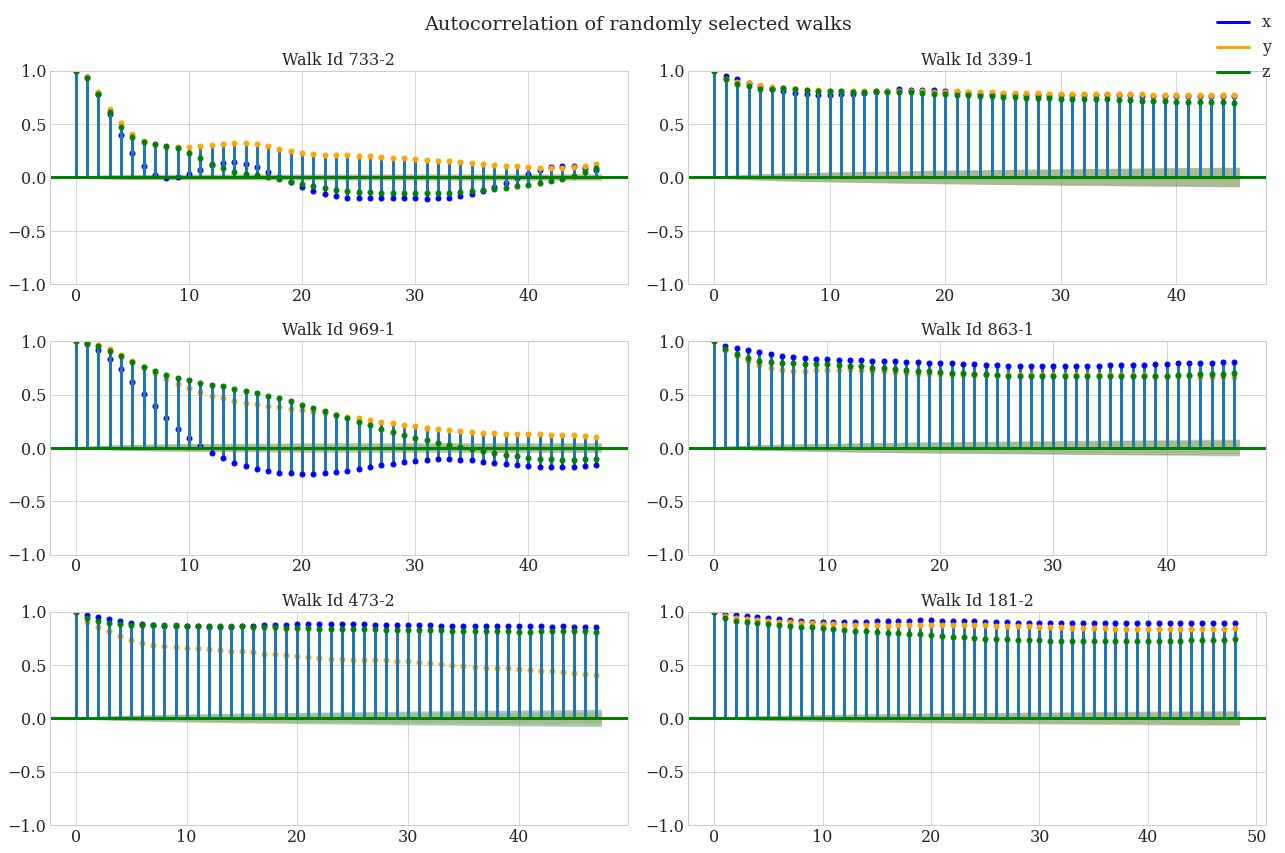

In [7]:
plt.rcParams["figure.figsize"] = (18,12)
fig, axes = plt.subplots(int(no_samples/2), 2)
axes_lookup=np.arange(no_samples).reshape(int(no_samples/2),2)
for i in range(no_samples):
    x,y=np.argwhere(axes_lookup==i).flatten()
    plot_acf(samples[i][1][:,0],axes[x,y],label='x', color='blue'); #downsampled to 1 sec , defaults to lags=25
    plot_acf(samples[i][1][:,1], axes[x,y],label='y', color='orange'); 
    plot_acf(samples[i][1][:,2], axes[x,y],label='z',color='green'); 
    axes[x,y].set_title('Walk Id {}'.format(samples[i][0]))
plt.suptitle('Autocorrelation of randomly selected walks')
plt.tight_layout()
handles, labels = axes[x,y].get_legend_handles_labels() #returns the legend of teh last axes
fig.legend(handles[::2], labels[::2])
plt.savefig("../reports/figures/{}acf.png".format(ref))

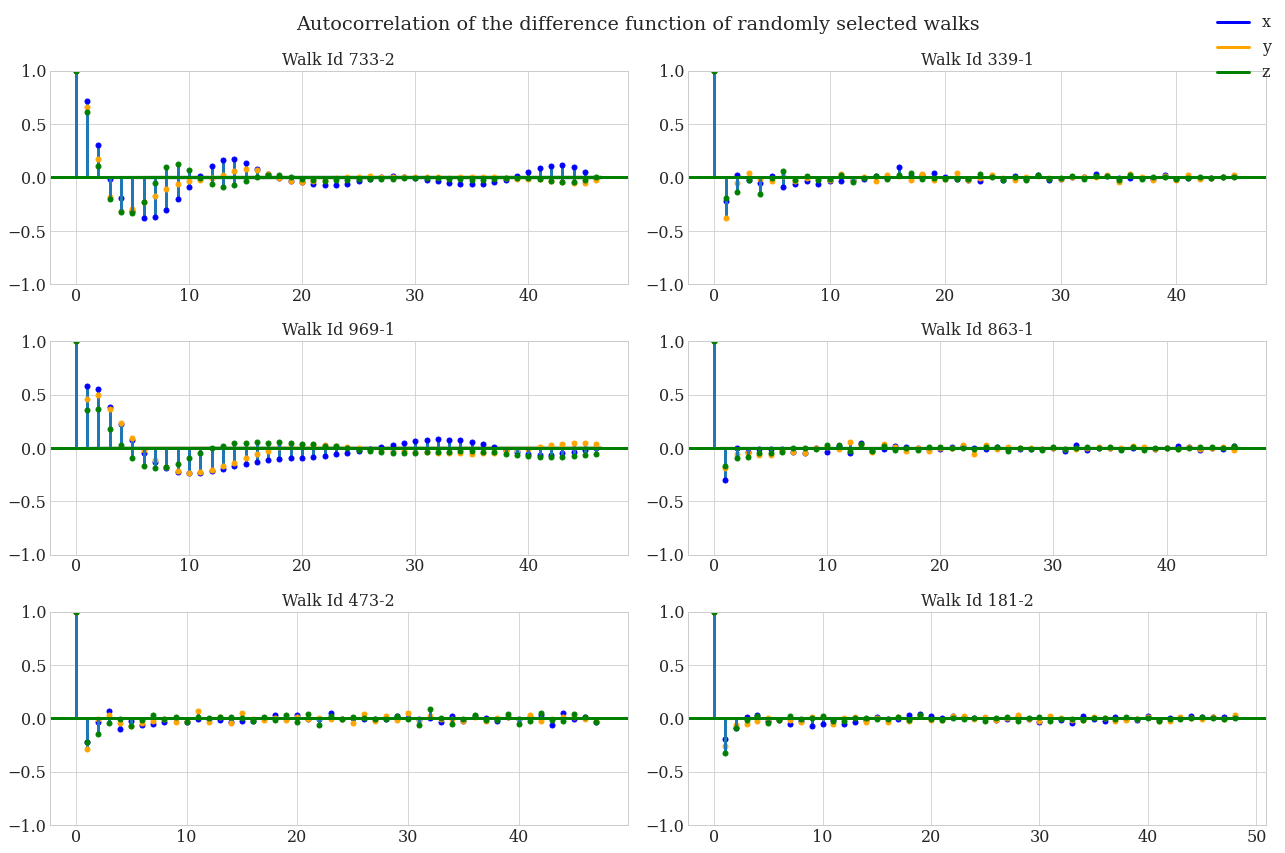

In [8]:
plt.rcParams["figure.figsize"] = (18,12)
fig, axes = plt.subplots(int(no_samples/2), 2)
axes_lookup=np.arange(no_samples).reshape(int(no_samples/2),2)
for i in range(no_samples):
    x,y=np.argwhere(axes_lookup==i).flatten()
    plot_acf(np.diff(samples[i][1][:,0]),axes[x,y],label='x', color='blue'); #downsampled to 1 sec , defaults to lags=25
    plot_acf(np.diff(samples[i][1][:,1]), axes[x,y],label='y', color='orange'); 
    plot_acf(np.diff(samples[i][1][:,2]), axes[x,y],label='z',color='green'); 
    axes[x,y].set_title('Walk Id {}'.format(samples[i][0]))
plt.suptitle('Autocorrelation of the difference function of randomly selected walks')
plt.tight_layout()
handles, labels = axes[x,y].get_legend_handles_labels() #returns the legend of teh last axes
fig.legend(handles[::2], labels[::2])
plt.savefig("../reports/figures/{}diff_acf.png".format(ref))

# Temporal Analysis grouped by speed

In [9]:
# Drop duplicate speeds
speeds=list(raw_data.drop_duplicates(subset=['speed'])['speed'].values)
#print('No. of available walk_ids (time series) in the dataset is {} performed by {} subjects'.format(len(walk_ids),len(set(subject_id))))
f.write('No. of available speeds (a continuous set of time series) in the dataset is {} performed by {} subjects \n\n'.format(len(speeds),len(set(subject_id))))


109

In [10]:
# Extract accelerations for each speed
speed_accls=[]
for i,speed in enumerate(speeds):
    this_speed_accls=raw_data[raw_data['speed']==speed][['x','y','z']].values
    speed_accls.append(this_speed_accls)

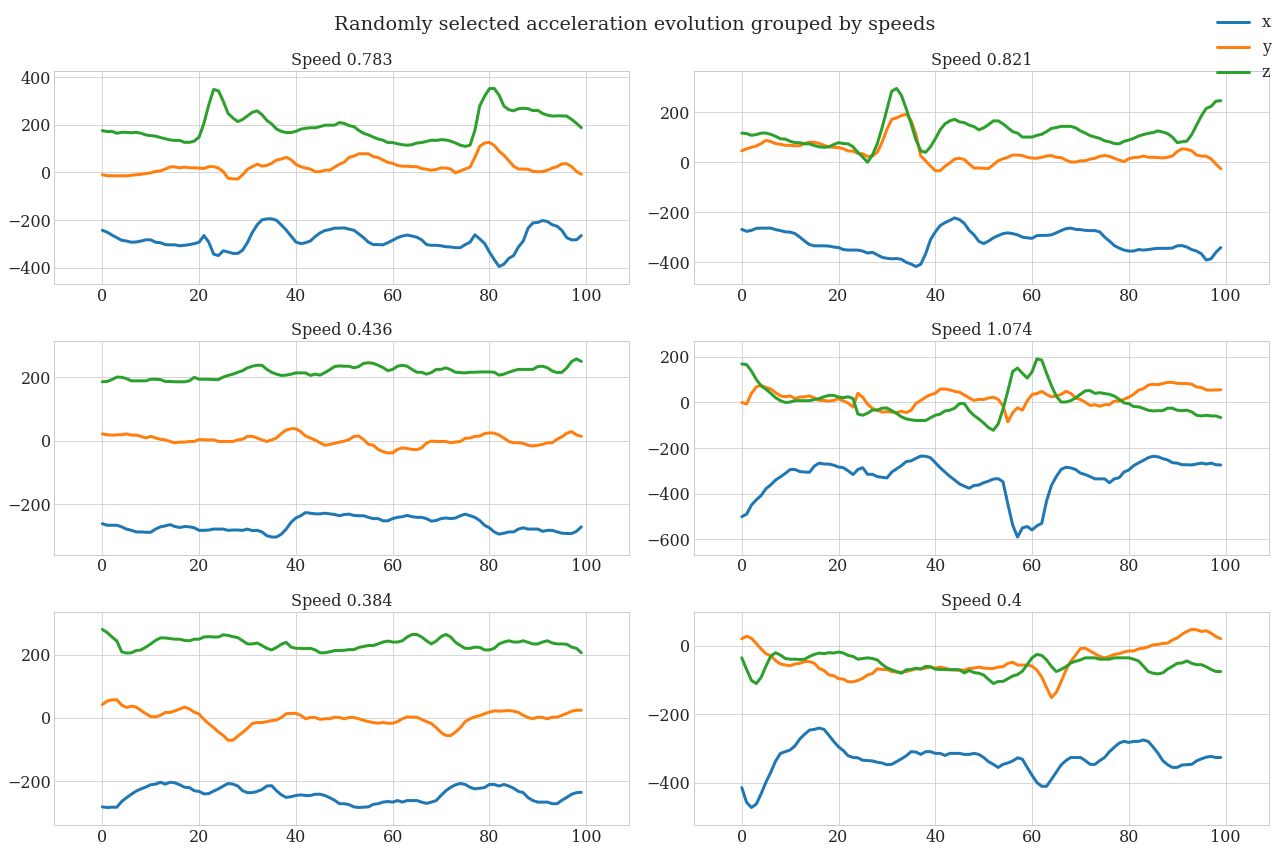

In [11]:
random.seed(12)
no_samples=6
samples=random.sample(list(zip(speeds, speed_accls)),no_samples)
plt.rcParams["figure.figsize"] = (18,12)
fig, axes = plt.subplots(int(no_samples/2), 2)
axes_lookup=np.arange(no_samples).reshape(int(no_samples/2),2)
for i in range(no_samples):
    x,y=np.argwhere(axes_lookup==i).flatten()
    axes[x,y].plot(samples[i][1][:,0], label='x'); 
    axes[x,y].plot(samples[i][1][:,1], label='y'); 
    axes[x,y].plot(samples[i][1][:,2], label='z'); 
    axes[x,y].set_title('Speed {}'.format(round(samples[i][0],3)))
plt.suptitle('Randomly selected acceleration evolution grouped by speeds ')
plt.tight_layout()
handles, labels = axes[x,y].get_legend_handles_labels() #returns the legend of teh last axes
fig.legend(handles, labels)
plt.savefig("../reports/figures/{}selected_speeds.png".format(ref))

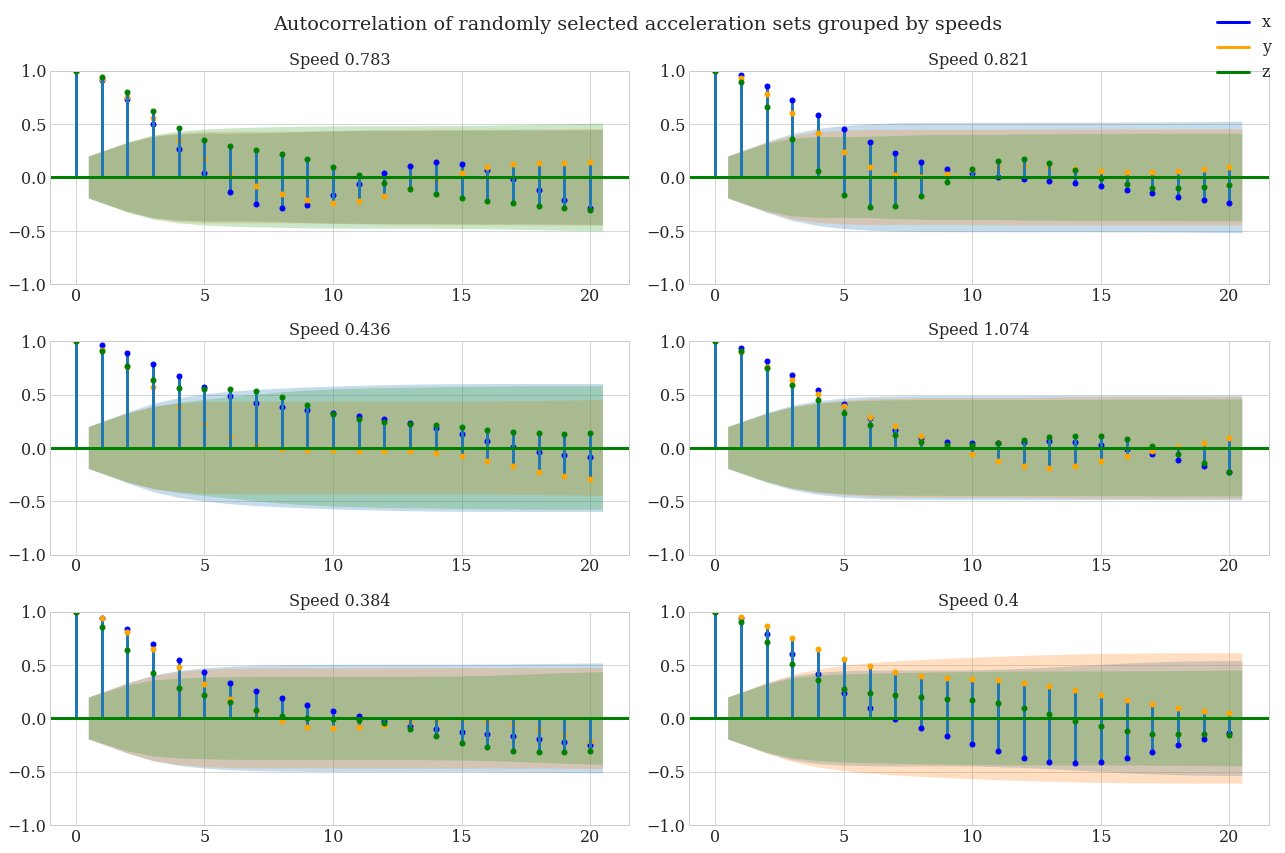

In [12]:
plt.rcParams["figure.figsize"] = (18,12)
fig, axes = plt.subplots(int(no_samples/2), 2)
axes_lookup=np.arange(no_samples).reshape(int(no_samples/2),2)
for i in range(no_samples):
    x,y=np.argwhere(axes_lookup==i).flatten()
    plot_acf(samples[i][1][:,0],axes[x,y],label='x', color='blue'); #downsampled to 1 sec , defaults to lags=25
    plot_acf(samples[i][1][:,1], axes[x,y],label='y', color='orange'); 
    plot_acf(samples[i][1][:,2], axes[x,y],label='z',color='green'); 
    axes[x,y].set_title('Speed {}'.format(round(samples[i][0],3)))
plt.suptitle('Autocorrelation of randomly selected acceleration sets grouped by speeds')
plt.tight_layout()
handles, labels = axes[x,y].get_legend_handles_labels() #returns the legend of teh last axes
fig.legend(handles[::2], labels[::2])
plt.savefig("../reports/figures/{}acf_by_speed.png".format(ref))

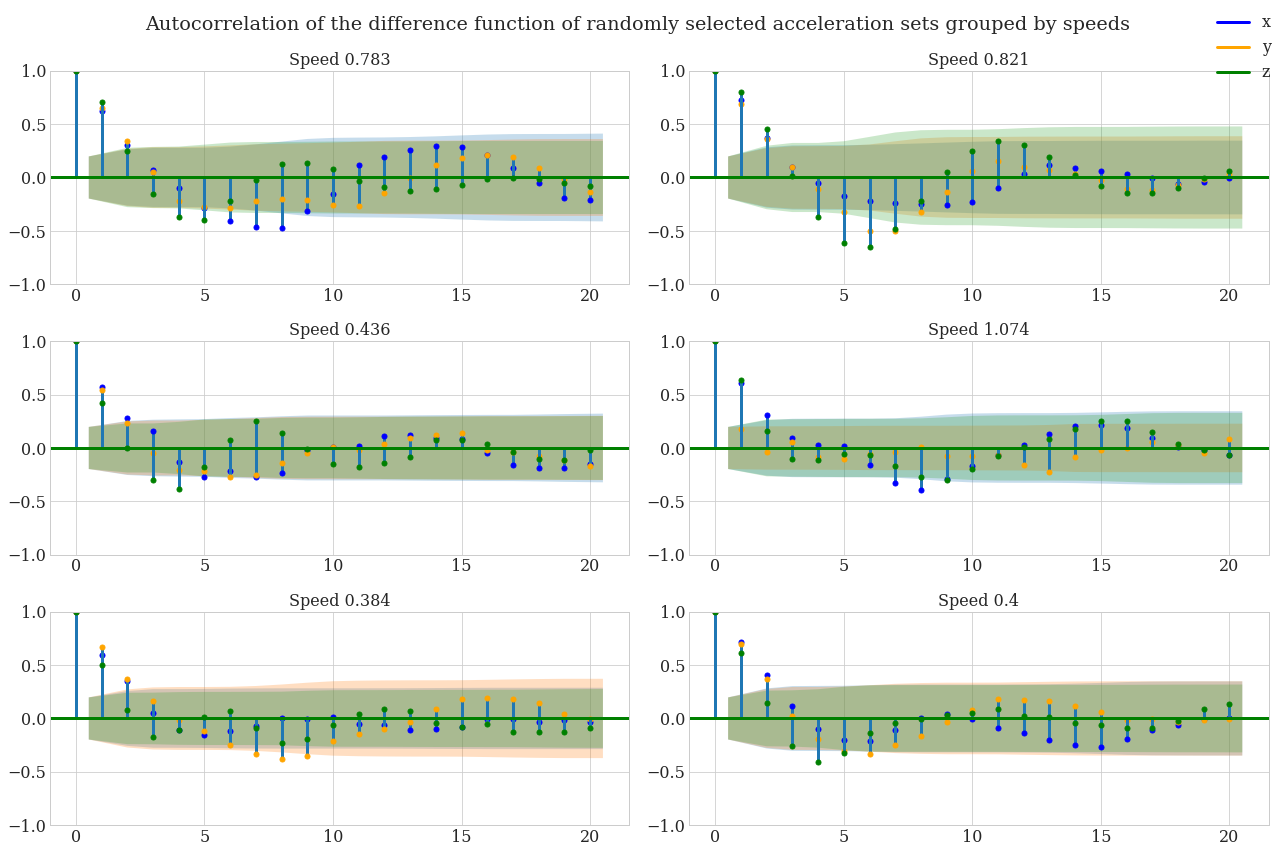

In [13]:
plt.rcParams["figure.figsize"] = (18,12)
fig, axes = plt.subplots(int(no_samples/2), 2)
axes_lookup=np.arange(no_samples).reshape(int(no_samples/2),2)
for i in range(no_samples):
    x,y=np.argwhere(axes_lookup==i).flatten()
    plot_acf(np.diff(samples[i][1][:,0]),axes[x,y],label='x', color='blue'); #downsampled to 1 sec , defaults to lags=25
    plot_acf(np.diff(samples[i][1][:,1]), axes[x,y],label='y', color='orange'); 
    plot_acf(np.diff(samples[i][1][:,2]), axes[x,y],label='z',color='green'); 
    axes[x,y].set_title('Speed {}'.format(round(samples[i][0],3)))
plt.suptitle('Autocorrelation of the difference function of randomly selected acceleration sets grouped by speeds')
plt.tight_layout()
handles, labels = axes[x,y].get_legend_handles_labels() #returns the legend of teh last axes
fig.legend(handles[::2], labels[::2])
plt.savefig("../reports/figures/{}diff_acf_by_speed.png".format(ref))

In [14]:
f.close()